# Week 7 - Introduction to regression models

Learning objectives: 
- become familiar with the mathematical notations that are frequently used in the ML community
- understand what a prediction model is
- understand what a loss function is
- understand what a regression model is and how the coefficients can be estimated
- be able to fit/estimate your own regression models  

In [134]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9, 6)

Assume that we have a dataset with 3 variables, 1 dependent variable and 2 independent variables. We are tasked to find a model which allows to use the independent variables to predict the dependent variable

In [135]:
np.random.seed(42)
N = 1000
cov = np.eye(3)
cov[(0,1), (1, 0)] = 0.9
df = pd.DataFrame(data=np.random.multivariate_normal(mean=[5, 0, 0], cov=cov, size=N),
                  columns=["DV", "IV1", "IV2"]) 
# DV = dependent variable, IV = independent variable
df.head()

,DV,IV1,IV2
0,4.371035,-0.339310,-0.138264
1,3.567889,-1.536820,-0.234153
2,3.565751,-1.644204,0.767435
3,4.575318,-0.632962,-0.463418
4,5.149868,-0.621539,-1.913280


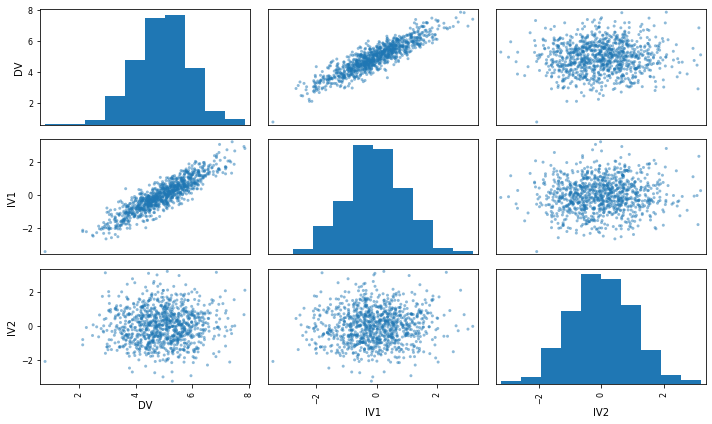

In [136]:
axes = pd.plotting.scatter_matrix(df) 
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()

Let's first focus on only using IV1 to predict DV

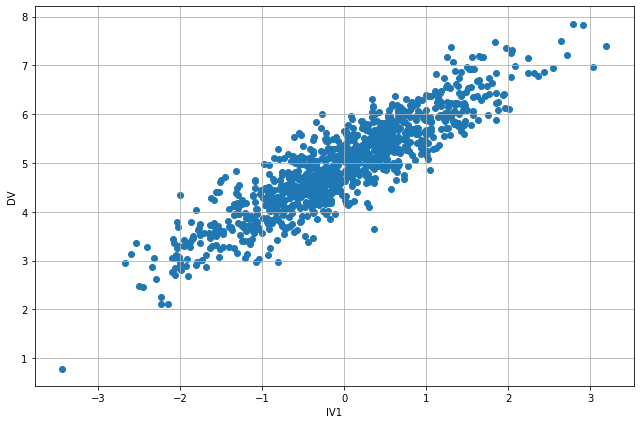

In [137]:
fig, ax = plt.subplots()
ax.scatter(df["IV1"], df["DV"])
ax.set_ylabel("DV") 
ax.set_xlabel("IV1")
ax.grid(which="both")
plt.tight_layout()

What would be a good model for predicting the dependent variable (DV) with a new observation of the independent variable IV1?

Let $y_i$ be the $i^{\text{th}}$ dependent variable and $x_i$ the $i^{\text{th}}$ observation of the independent variable IV1. A possible statistical model for predicting $y_i$ could be then specified as
$$
y_i = f(x_i) + \epsilon_{i}, 
$$
where $f(x_i)$ is our prediction model and $\epsilon_{i}$ is some irreducible noise. $\epsilon_{i}$ is itself a random variable. But for now we don't worry about its distribution. 

In simple terms; we are using the model $f(x_i)$ (which takes the independent variable as an input) for predicting the dependent $y_i$. However, due to the randomness in the random variable $Y$, we are not able to perfectly predict $y_i$. This randomness (or the inability to predict $Y$ perfectly) is captured in the error term $\epsilon_i$.

Assume that we obtain a new observation $x$ for the independent variable. We then use our model to predict the dependent variable $y$. The prediction is obtained with 
$$
\hat{y} = f(x) , 
$$
where we again use the $\hat{\ }$ notation to denote a prediction (estimate). We can calculate the prediction error (often also called the residual)
$$
e = y - \hat{y}
$$
once we obtained the true value of the dependent variable. 

Let's go back to our example. What about using the following model to predict the dependent variable?  
$$
f(x) = x
$$

Is it any good?

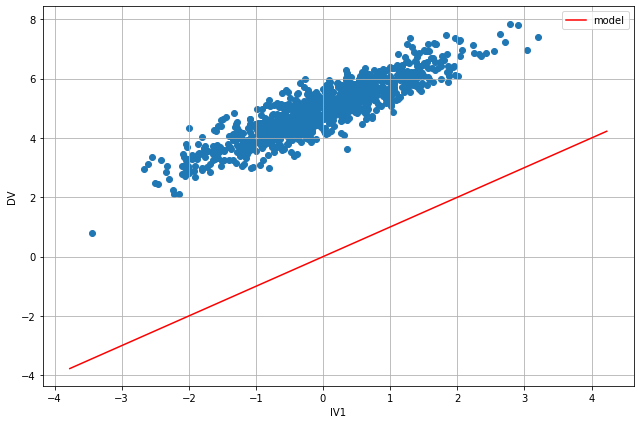

In [138]:
fig, ax = plt.subplots()
ax.scatter(df["IV1"], df["DV"])
x_min, x_max= ax.get_xlim()
ax.plot(np.arange(x_min, x_max + 1), np.arange(x_min, x_max + 1), c="red", label="model")
ax.set_ylabel("DV") 
ax.set_xlabel("IV1")
ax.grid(which="both")
ax.legend()
plt.tight_layout()

This doesn't look any good. There seems to be an offset between our predictions (red line) and observations.

Let's try to plot the forecast errors 

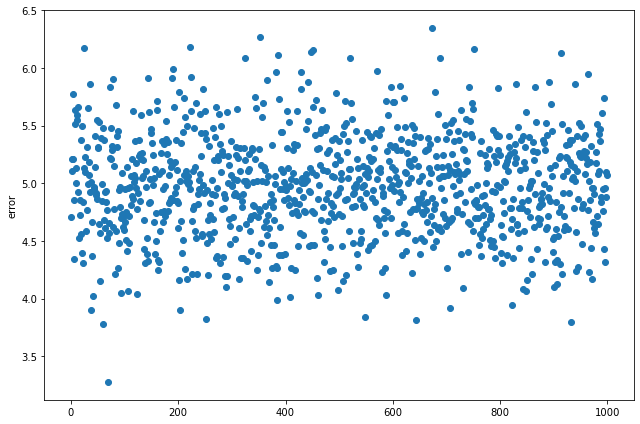

In [139]:
y = df["DV"].copy()
x = df["IV1"].copy()

res = y - x  # calculate the prediction error/residual
# remember that our model is defined as f(x) = x. that's why the residual is calculated
# this way

fig, ax = plt.subplots()
ax.scatter(np.arange(N), res)
ax.set_ylabel("error")
plt.tight_layout()

In [140]:
bias = np.mean(res)  # the mean of the forecast error is called "bias"
print(bias)  # it seems that the forecasts are "heavily" biased

4.978998834560416


The forecast errors seem to be centered around 5. 

So what about using the following model?
$$
f(x) = 5 + x
$$

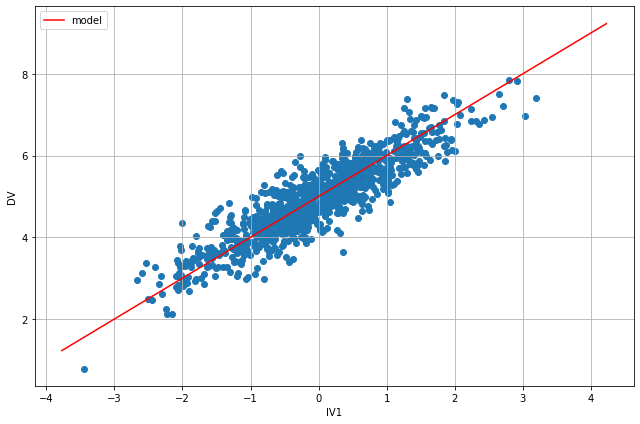

In [141]:
fig, ax = plt.subplots()
ax.scatter(df["IV1"], df["DV"])
x_min, x_max= ax.get_xlim()
ax.plot(np.arange(x_min, x_max + 1), 5 + np.arange(x_min, x_max + 1), c="red", label="model")
ax.set_ylabel("DV") 
ax.set_xlabel("IV1")
ax.grid(which="both")
ax.legend()
plt.tight_layout()

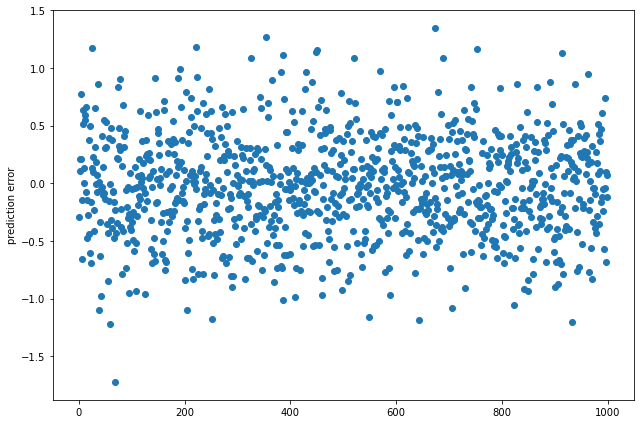

In [142]:
y_hat = 5 + x  # calculate predictons
res = y - y_hat # residual

fig, ax = plt.subplots()
ax.scatter(np.arange(N), res)
ax.set_ylabel("prediction error")
plt.tight_layout()

## Linear regression

Assume you have a dataset with $n$ observations for the dependent variable and the selected $p$ independent variables. Linear regression models the relationship between the dependent variable and $p$ independent variables as
$$
y_i = \beta_0 + \beta_1  x_{i1} + \beta_2  x_{i2} + \dots + \beta_p  x_{ip} + \epsilon_i = f(\bf{x}_i; \bf{\beta}) + \epsilon_i, 
$$
for all $i \in \{1, 2, \dots, N \}$ and where $\bf{x}_i = (x_{i1},x_{i2}, \dots, x_{ip})$ is the vector of independent variables.

How do we obtain values for the model coefficients $\beta_0,\beta_1,\dots, \beta_p$? That is, how do we $\textbf{estimate}$ our model coefficients with the data that we have already observed?

There are 2 ingredients for this:
1. specifying a loss function
2. choosing/building an algorithm to solve the resulting optimisation problem

Loss function: 

The loss function specifies how "costly" prediction errors are to us. One of the most common loss functions are:
1. Squared error: $$L(y, \hat{y}) = (y - \hat{y})^2 $$
2. Absolute error: $$L(y, \hat{y}) = |y - \hat{y}| $$



However, they can also be customized to particuplar aspects of the prediction problem (e.g. it could be more costly to have large prediction errors during certain hours of the day than during others)

Usually, the average loss is considered during the optimisation. Thus, we can obtain estimates for our model coefficients by minimizing the average loss across our observed data. This can be written as 
$$
\hat{\bf{\beta}} = min \ \frac{1}{n} \sum_{i=1}^n L(y_i, f(\bf{x}_i, \beta))  , 
$$
where $min$ denotes minimisation operator. In simple words: the above equation means that we obtain estimates for our model coefficients $\beta_0, \beta_1, \beta_2, \dots, \beta_p$ by minimising the average loss.  


Generally, it depends on the loss function and the model how difficult it is to solve the minimisation problem. The minimisation can be carried out very conveniently for a linear model and a squared loss function.

## Ordinary least squares

For a linear model $f(\bf{x}_i; \bf{\beta})$, the ordinary least squares solves the following minimisation problem
$$
\hat{\bf{\beta}} = min \ \frac{1}{n} \sum_{i=1}^n (y_i - f(\bf{x}_i; \bf{\beta}))^2
$$


Let $y = (y_1, y_2, \dots, y_n)^\top$ be the column vector of observed dependent variables and $X = (\bf{x}_1,\bf{x}_2, \dots, \bf{x}_n)^\top$ be the $n \times p$ matrix of independent variables. Further, let $\beta = (\beta_1, \beta_2, \dots, \beta_p)^\top$ be the column vector of the model coefficients.

The model for all $n$ observations is then written in vector form as
$$
\bf{y} = \bf{X} \bf{\beta} + \bf{\epsilon}, 
$$
where $\bf{\epsilon}$ is a column vector of $n$ error terms.

The minimisation problem can be rewritten as 
$$
\hat{\bf{\beta}} = min \  \frac{1}{n} ||\bf{y} - \bf{X} \bf{\beta}||^2 , 
$$
where $|| \  ||$ denotes the vector $l_2$-norm. Under some restrictions, the solution to the minimisation problem is obtained as
$$
\hat{\beta} = (\bf{X}^\top \bf{X})^{-1} \bf{X}^\top \bf{y}
$$


## Example

Let's return to our previous example of predicting the dependent variable with only IV1. Let our model be specified by
$$
f(\tilde{x}) = \beta_0 + \beta_1 \tilde{x}, 
$$
where $\tilde{x}$ denotes the independent variable 1. We can rewrite this more compact as 
$$
f(x) = \bf{x}^\top \bf{\beta}, 
$$
where $x = (1, \tilde{x})^\top$ and $\bf{\beta} = (\beta_0, \beta_1)^\top$ are column vectors. Rewriting the model allows us to use the ordinary least squares to obtain estimates for $\beta_0$ and $\beta_1$ very conveniently.

The following code shows how this is done.

In [143]:
y = df["DV"].values.copy().reshape(-1, 1)  # create a n x 1 column vector
x_tilde = df["IV1"].values.copy().reshape(-1, 1)  # also a n x 1 column vector
X = np.concatenate([np.ones([len(x_tilde), 1]), x_tilde], axis=1)  # create the matrix X where the first column is just 1

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # use the OLS to obtain an estimate for the model coefficients 
beta_hat0, beta_hat1  = beta_hat.flatten()

res = y - X @ beta_hat  # calculate the residual
# res = y - beta_hat1 * x_tilde - beta_hat0  # this is equivalent to the above line of code
print(f"beta_hat0={round(beta_hat0, 3)}, beta_hat1={round(beta_hat1, 3)}")

beta_hat0=4.974, beta_hat1=0.89


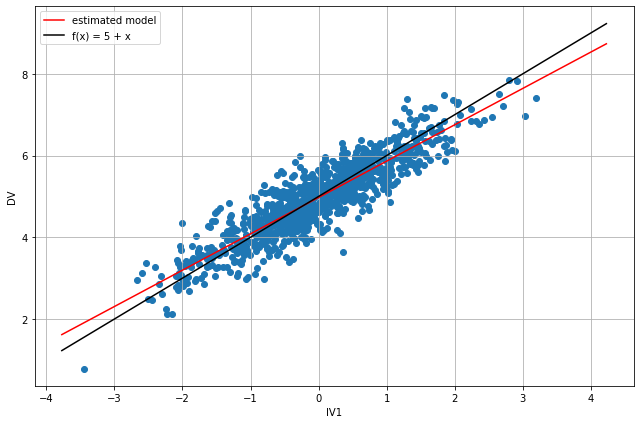

In [144]:
fig, ax = plt.subplots()
ax.scatter(df["IV1"], df["DV"])
x_min, x_max= ax.get_xlim()
ax.plot(np.arange(x_min, x_max + 1), beta_hat0 + beta_hat1 * np.arange(x_min, x_max + 1), c="red", label="estimated model")
ax.plot(np.arange(x_min, x_max + 1), 5 + np.arange(x_min, x_max + 1), c="black", label="f(x) = 5 + x")
ax.set_ylabel("DV") 
ax.set_xlabel("IV1")
ax.grid(which="both")
ax.legend()
plt.tight_layout()

## What about including the second independent variable? 

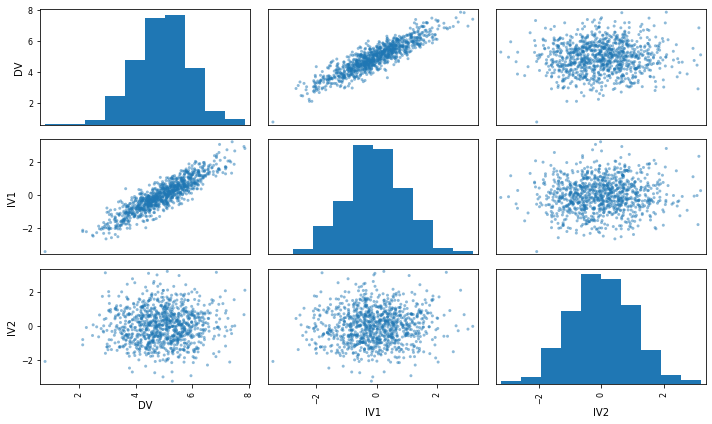

In [145]:
axes = pd.plotting.scatter_matrix(df) 
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
# any ideas what the value of the regression coefficient for IV2 will be? 

In [146]:
y = df["DV"].values.copy().reshape(-1, 1)  # create a n x 1 column vector
x_tilde = df[["IV1", "IV2"]].values.copy()  # x_tilde is now a n x 2 matrix
X = np.concatenate([np.ones([len(x_tilde), 1]), x_tilde], axis=1)  # create the matrix X where the first column is just 1

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # use the OLS to obtain an estimate for the model coefficients 
beta_hat0, beta_hat1, beta_hat2  = beta_hat.flatten()

print(f"beta_hat0={round(beta_hat0, 3)}, beta_hat1={round(beta_hat1, 3)}, beta_hat2={round(beta_hat2, 3)}")
# the regression coefficient of IV2 is close to 0, which means that there seems to be no LINEAR relationship between 
# DV and IV2. 

beta_hat0=4.974, beta_hat1=0.89, beta_hat2=-0.009


## What happens if we start using more and more features?

In [147]:
np.random.seed(42)
n = 10
x_tilde = np.random.normal(0, 1, [n, 1])
y = 2*x_tilde + np.random.normal(0, 0.1, [n, 1])

X = np.repeat(x_tilde, n, axis=1)
X = X ** np.arange(1, n+1)

beta_hat = np.linalg.pinv(X.T @ X) @ X.T @ y  # calculate the coefficient estimates
res = y - X @ beta_hat  

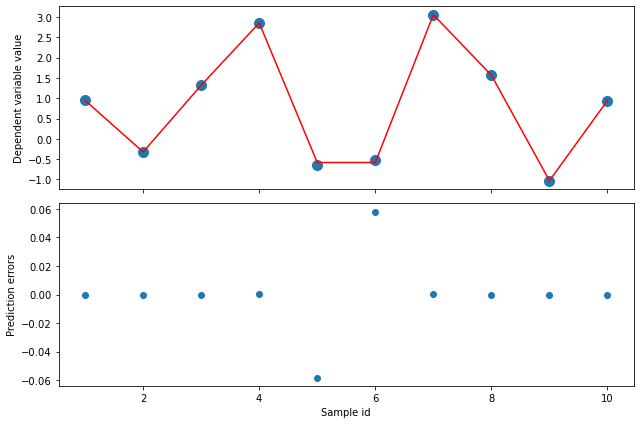

In [148]:
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].scatter(np.arange(1, n + 1), y,s=100, label="observations")
ax[0].plot(np.arange(1, n + 1), X @ beta_hat, label="model", c="red")
ax[0].set_ylabel("Dependent variable value")

ax[1].scatter(np.arange(1, n + 1), res)
ax[1].set_xlabel("Sample id")
ax[1].set_ylabel("Prediction errors")
plt.tight_layout()

the behavior that you see is called "overfitting". We'll discuss it next week! 